In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

C:\Users\Mukesh Sirvi\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
train_dir = 'NEU Metal Surface Defects Data/train'
val_dir = 'NEU Metal Surface Defects Data/valid'
test_dir='NEU Metal Surface Defects Data/test'
print("Path: ",os.listdir("NEU Metal Surface Defects Data"))
print("Train: ",os.listdir("NEU Metal Surface Defects Data/train"))
print("Test: ",os.listdir("NEU Metal Surface Defects Data/test"))
print("Validation: ",os.listdir("NEU Metal Surface Defects Data/valid"))

Path:  ['test', 'train', 'valid']
Train:  ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']
Test:  ['crazing', 'inclusion', 'patches', 'pitted', 'rolled', 'scratches']
Validation:  ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


In [3]:
print("Inclusion Defect")
print("Training Images:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Images:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Images:",len(os.listdir(val_dir+'/'+'Inclusion')))

Inclusion Defect
Training Images: 228
Testing Images: 12
Validation Images: 60


In [4]:
# Rescaling all Images by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training images are put in batches of 10
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Validation images are put in batches of 10
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1368 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [5]:
train_generator.class_indices

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled-in_scale': 4,
 'scratches': 5}

In [6]:
validation_generator.class_indices

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled-in_scale': 4,
 'scratches': 5}

In [7]:
from tensorflow.keras.applications import Xception
xcept=Xception(input_shape=(200,200,3),weights="imagenet",include_top=False)

In [8]:
for layer in xcept.layers:
    layer.trainable=False
    
    
model=Sequential([
            xcept,
            Flatten(),
            Dense(units=200,activation="relu"),
            Dropout(0.2),
            Dense(units=6,activation="softmax")])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 200)               20070600  
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 40,933,286
Trainable params: 20,071,806
Non-trainable params: 20,861,480
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [12]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
                    callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
137/137 [==============================] - 112s 800ms/step - loss: 2.1819 - accuracy: 0.8363 - val_loss: 0.8353 - val_accuracy: 0.8639
Epoch 2/20
137/137 [==============================] - 97s 707ms/step - loss: 0.5278 - accuracy: 0.9327 - val_loss: 0.4157 - val_accuracy: 0.9278
Epoch 3/20
137/137 [==============================] - 95s 692ms/step - loss: 0.3546 - accuracy: 0.9591 - val_loss: 0.3835 - val_accuracy: 0.9389
Epoch 4/20
137/137 [==============================] - 99s 723ms/step - loss: 0.2733 - accuracy: 0.9642 - val_loss: 0.5929 - val_accuracy: 0.9250
Epoch 5/20
137/137 [==============================] - 101s 738ms/step - loss: 0.1556 - accuracy: 0.9751 - val_loss: 0.4067 - val_accuracy: 0.9528
Epoch 6/20
137/137 [==============================] - 107s 778ms/step - loss: 0.3005 - accuracy: 0.9708 - val_loss: 0.3189 - val_accuracy: 0.9639
Epoch 7/20
137/137 [==============================] - ETA: 0s - loss: 0.1787 - accuracy: 0.9839
Reached 98% accuracy so cancell

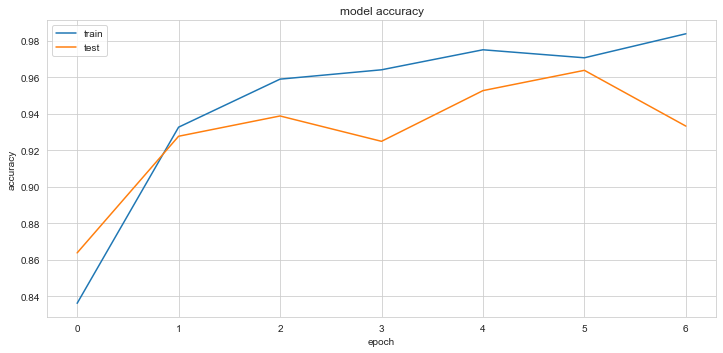

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

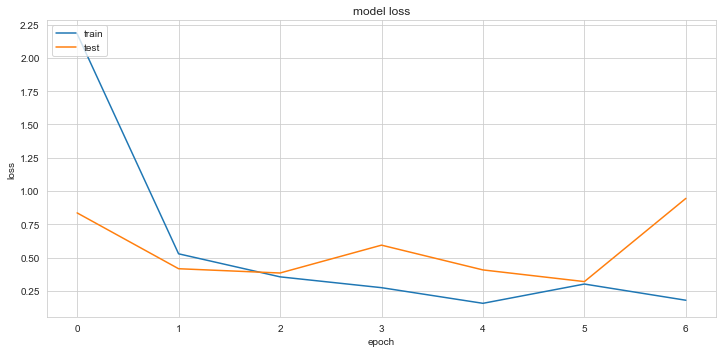

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [15]:
# Loading file names & their respective target labels into numpy array
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
x_test, y_test,target_labels = load_dataset(test_dir)
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [16]:
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [17]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [18]:
x_test = x_test.astype('float32')/255

3/3 [==============================] - 3s 740ms/step


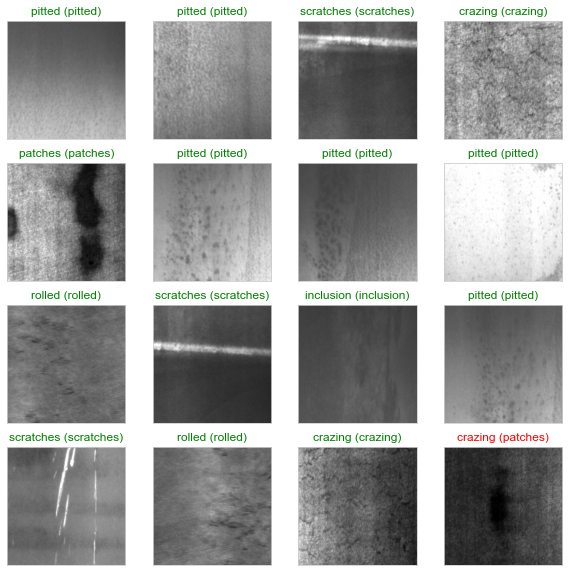

In [19]:
# Plotting Random Sample of test images, their predicted labels, and ground truth
y_pred = model.predict(x_test)
fig = plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))